In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "/home/ljn/ros/mbzirc_finals_gqz_ws/src/range_localization/Log/"

loose_couple = True
predict=np.loadtxt(path + 'predict.txt')
print(predict.shape)

update1=np.loadtxt(path + 'update1.txt')
print(update1.shape)





(11929, 11)
(11525, 26)


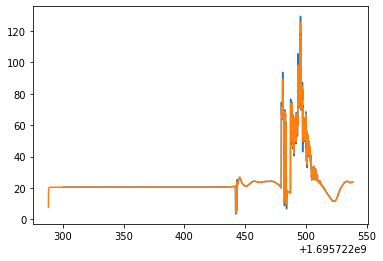

In [10]:
plt.figure()
plt.plot(predict[:,0],predict[:,1])

plt.plot(update1[:,0],update1[:,1])

# plt.plot(update1[:,0],update1[:,20])

plt.show()

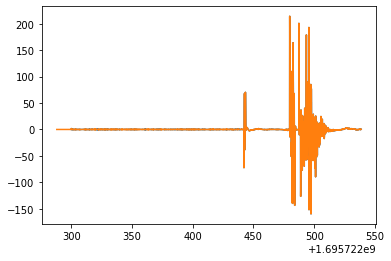

In [11]:
plt.figure()
plt.plot(predict[:,0],predict[:,2])

plt.plot(update1[:,0],update1[:,2])

# plt.plot(update1[:,0],update1[:,21])

plt.show()

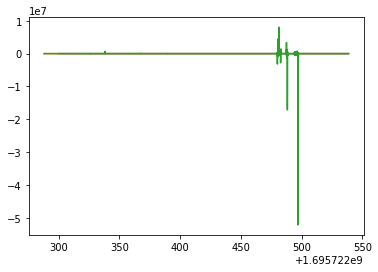

In [13]:
plt.figure()
plt.plot(predict[:,0],predict[:,3])

plt.plot(update1[:,0],update1[:,3])

plt.plot(update1[:,0],update1[:,22])

plt.show()

Text(0.5, 0, 'Time (s)')

<Figure size 4015.75x708.661 with 0 Axes>

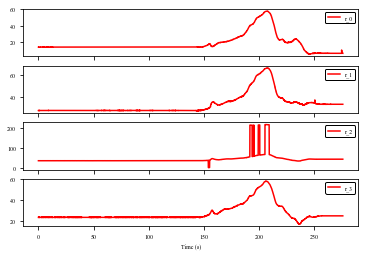

In [17]:
import rosbag

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import sys
# import scienceplots




bag_file = "/home/ljn/ros/mbzirc_finals_gqz_ws/data_folder/anyang_2023-09-26-17-58-07.bag"
bag = rosbag.Bag(bag_file)
topics = ['/suav/uwb/nlink_linktrack_nodeframe3']

def key_elem(elem):
        return elem.id

ac_s = 4
# discard the first two data
uwb_measurement = [[],[],[],[]]

for topic, msg, t in bag.read_messages(topics=topics):
    if topic.find('/suav/uwb/nlink_linktrack_nodeframe3') != -1:
        # print(len(msg.nodes))
        for i in range(len(msg.nodes)):
            uwb_measurement[int(msg.nodes[i].id)].append([t.to_sec(),msg.nodes[i].dis])

ranges = []
for i in range(ac_s):
    ranges.append(np.array(uwb_measurement[i]).reshape(len(uwb_measurement[i]),2))

# with plt.style.context(['science']):
cm = 1/2.54 # centimeters in inches
plt.figure(figsize=(8.5*cm*ac_s,6*cm),dpi = 300)
fig, ax = plt.subplots(ac_s,1,sharex=True)
# --, -,-.,: gree blue red magenta
rc = {"font.family" : "Times New Roman","mathtext.fontset" : "stix",}
# font_manager.fontManager.addfont("/Users/lvjunning/Documents/vscode/Fonts/simfang.ttf")
plt.rcParams.update(rc)
color_user = ['g','b','r','m']
for j in range(ac_s):
    
    # ax[idx].plot(DistantDataFrameMove['%time'] - DistantDataFrameMove['%time'][0],DistantDataFrameMove['r_tag'+str(i)+'_anchors'+str(j)],label='r_{}{}'.format(i,j))
    # ax[idx].plot(rangesMove[i][:,0] - DistantDataFrameMove['%time'][0], rangesMove[i][:,j+1],label='$\check{r}$' + '_{}{}'.format(i,j))
    ax[j].plot(ranges[j][:,0] - ranges[j][0,0], ranges[j][:,1],label='r_{}'.format(j), color = color_user[2])
    # ax2 = ax[j].twinx()
    # ax2.fill_between(nlos_rssi[i][:,0] - DistantDataFrameMove['%time'][0], 0, -nlos_rssi[i][:,j+1], alpha=.8, linewidth=0, color = color_user[3])
    # ax2.fill_between(NLOSDataFrame['%time'] - DistantDataFrameMove['%time'][0], NLOSDataFrame['nlos_tag'+str(i)+'_anchors'+str(j)], 0, alpha=.8, linewidth=0, color = color_user[1])
    ax[j].legend(loc = 'best', fontsize = 6, edgecolor = 'black',framealpha=1)
    ax[j].tick_params(axis='both', which='major', labelsize=6)
    # ax[idx].set_title('Comparation of refined/raw UWB measurements and truth while UAV moving',fontsize=6)
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
# fig.sticle_params(axis='both', which='major', labelsize=6)
plt.xlabel(r'Time (s)',fontsize=6)
# plt.tight_layout()
# plt.savefig(path + 'range_result.png', dpi=1000)
# plt.show()
# plt.cla()